## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

 - BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
 - Company needs a business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
 
Let's perform the below :

 - Identify the variables affecting
 - Create a Linear model
 - Find the accuracy of the model
 
Considering '`cnt`' as our target variable 

### Data Understanding

In [1]:
#import pandas to read the data
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)# Changing to show more rows for visual analysis
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Changing display format to not show scientific notation
pd.set_option('display.max_columns', 500) # Displaying all columns


#import chardet to determine the file encoding
import chardet

#import numpy 
import numpy as np

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import matplotlib, seaborn for Data Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#import sm from statsmodel to build the model
import statsmodels.api as sm  

#import variance_inflation_factor to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Let's import other libraries as we wrok on our analysis

In [2]:
#Identify the encoding type of the day 'csv' file using chardet
with open('day.csv','rb') as f:
       data = f.read()
encode = chardet.detect(data).get("encoding")
print('File Encoding : ',encode)

File Encoding :  ascii


In [3]:
#Read the day.csv file intoo 'Rentals' DataFrame
Rentals = pd.read_csv('day.csv',encoding=encode,low_memory=False)

In [4]:
#Data in 'Rentals' DataFrame
Rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [5]:
Rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Shape of the DataFrame
Rentals.shape

(730, 16)

In [7]:
Rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


Observation:
    
   - We have `binary`, `categorical`, `numerical continous` variables in our dataset. Let's handle them in Data Preparation part.
   - Most of the columns are of int,float type.
   - we have a dataset of `730` rows and `16` columns
   - And the categorical variables having values interms of '0, 1, 2' - which we will later convert into string values to extract the meaningful insights
   - We do have larger values in few columns like '`hum`, `casual` , `registered`, `cnt`'

### Data Cleaning | Preparing

In [8]:
#null value percentage
(Rentals.isnull().sum() / len(Rentals)).mean() *100

0.0

Dropping below columns :
 
 - '`instant`': considering insignificant in our analysis
 - '`dteday`' : we already have the most of the data needed in other columns like 'yr,weekday,mnth'
 - '`causal` & `registered`' : '`cnt`', target variable - is nothing but the `casual` + `registered` 

In [9]:
#dropping the 'dteday','instant' ,'causal','registered'
Rentals.drop(columns=['dteday','instant','casual','registered'],inplace=True)

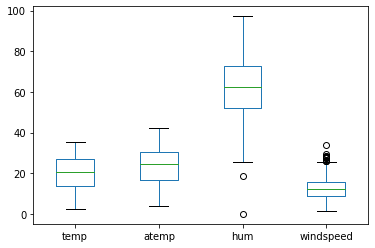

In [10]:
#boxplot to see the outliers in our data
Rentals[['temp','atemp','hum','windspeed']].plot.box()

Observation :

 - There are no missing values in our data
 - not dealing the outliers as I am going to apply min-max scaling which will handle the outliers 

In [11]:
Rentals.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


Notice that columns like - 'season' , 'weathersit' have values as 1, 2, 3, 4 which have specific labels associated with them.

 - These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case

 Let's convert such feature values into categorical string values before proceeding with model building.

Lets Map the `weathersit` to corresponding values:

    - 1 : 'weatherType1' : 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    - 2 : 'weatherType2' : 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' 
    - 3 : 'weatherType3' : 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    - 4 : 'weatherType4' : 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
   
 Similarly, `month` with corresponding string values and `weekday` as follows:
     - {0:'Tuesday',1:'wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'}

In [12]:
#Function to map the string values to the categorical values
def Map_String_Values(DataFrame,col,mapDict):
    DataFrame[col] = DataFrame[col].map(mapDict)

In [13]:
#Map the categorical with their string values to have better undestanding
Map_String_Values(Rentals,'season',{1:'spring',2:'summer',3:'fall',4:'winter'})

Map_String_Values(Rentals,'weathersit',{1:'weatherType1',
                                         2:'weatherType2',
                                         3:'weatherType3',
                                         4:'weatherType4'})
Map_String_Values(Rentals,'weekday',{0:'tuesday',1:'wednesday',
                                     2:'thursday',3:'friday',
                                     4:'saturday',5:'sunday',6:'monday'})
Map_String_Values(Rentals,'mnth',{1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                                  5:'May',6:'Jun',7:'Jul',8:'Aug',
                                  9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [14]:
Rentals.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,0,weatherType2,14.11,18.18,80.58,10.75,985
1,spring,0,Jan,0,tuesday,0,weatherType2,14.90,17.69,69.61,16.65,801
2,spring,0,Jan,0,wednesday,1,weatherType1,8.05,9.47,43.73,16.64,1349
3,spring,0,Jan,0,thursday,1,weatherType1,8.20,10.61,59.04,10.74,1562
4,spring,0,Jan,0,friday,1,weatherType1,9.31,11.46,43.70,12.52,1600


In [15]:
Rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visualisation

 Let's do pairplot for our numerical variables to have a better understanding.

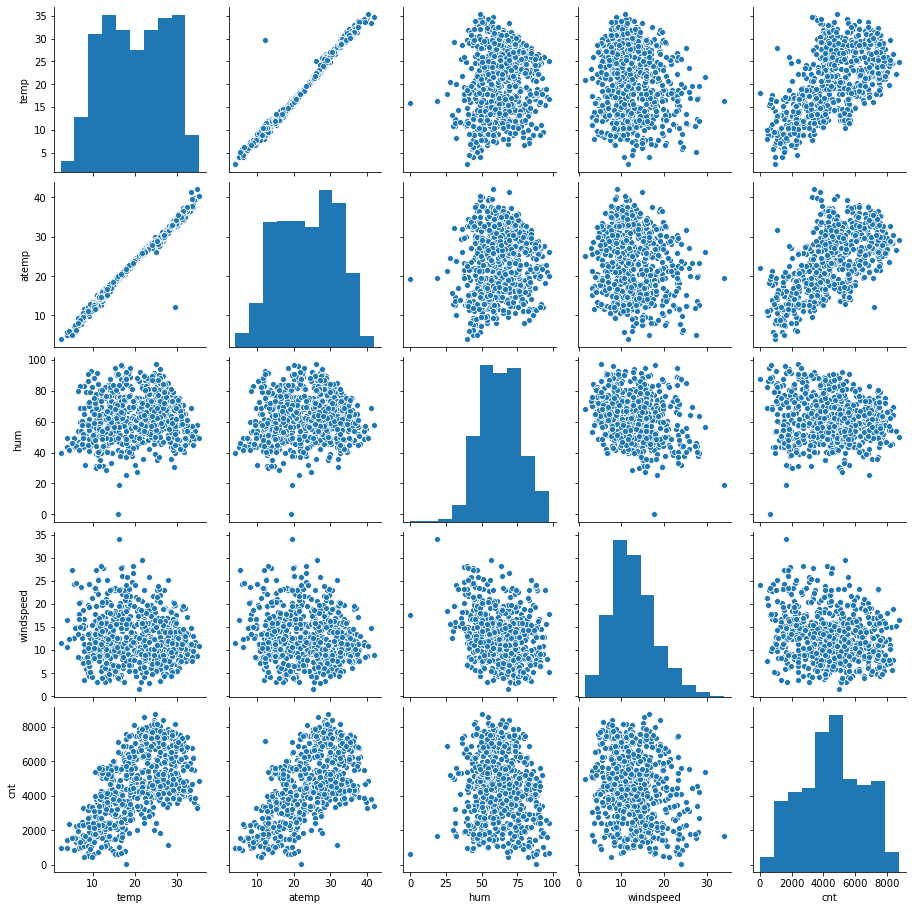

In [16]:
#plot the numerical variables using pairplot
sns.pairplot(Rentals[['temp','atemp','hum','windspeed','cnt']])
plt.show()

Observation:

   - There is a linearity observed in the dataset . It high in 'temp','atemp' and a little in'hum','windspeed'
   - `atemp` & `temp` are highly correlated and most of the data is similar
   - So, let's drop the `atemp`
   - compared to all the other variables  the `cnt` is highly related with the `temp`

In [17]:
#Drop 'atemp', as we are getting most of the data from 'temp'
Rentals.drop(columns=['atemp'],inplace=True)

In [18]:
#Function for boxlpot 
def boxPlot(DataFrame,cols,wrt):
    plt.figure(figsize=(35,12))
    i = 2
    j = (len(cols)//2)+1
    fig = 1
    for col in cols:
        plt.subplot(i,j,fig)
        sns.boxplot(x = col, y = wrt, data = DataFrame,palette ='pastel')
        fig = fig + 1
    plt.show()

There are few categorical variables in our data. For those, we will use boxlpot .

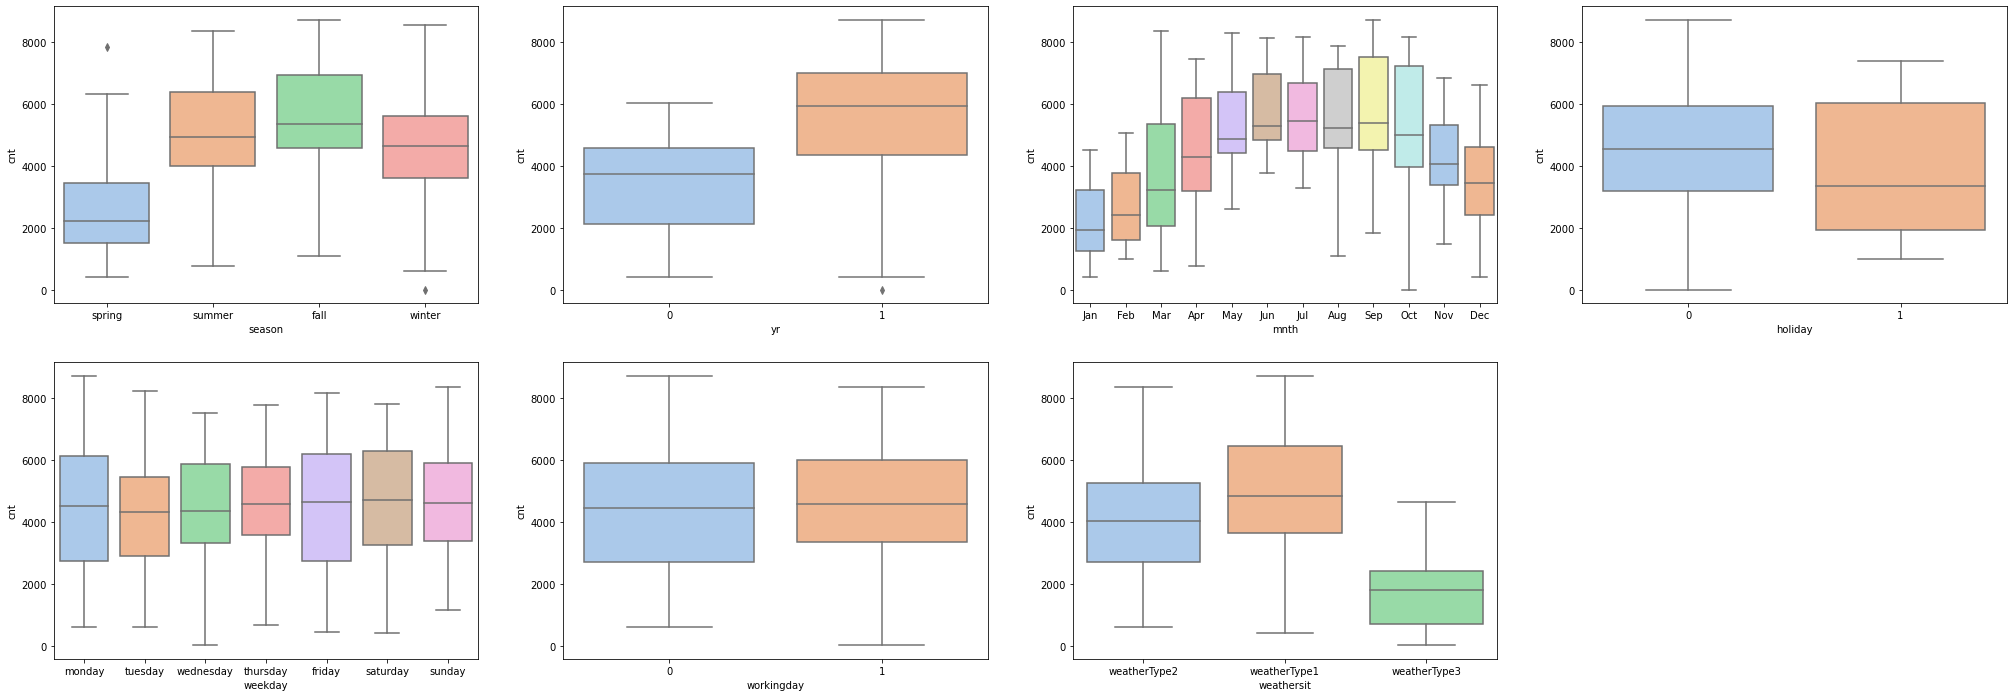

In [19]:
Categoricals = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
boxPlot(Rentals,Categoricals,'cnt')

Observation:
   - `season` 	: 'fall' has high chance of having higher bike shares compared to 'spring & winter'. Next to ‘fall’ –       ‘summer’ has high chances of bike shares.
   - `yr`		:  1 indicates 2019 has higher ‘cnt’ – we can infer that in future the bike shares increase comparatively.
   - `mnth`   	: it has some seasonal trend associated with it. - however, in Jul & sep- we have more chances of having high ‘cnt’.
   - `holiday`	: maximum bike rentals happen during holidays is almost equal to minimum rentals when there is no holiday. 
   - `weekday`	: There is no much difference, but notice that monday,friday,saturday has higher bike shares
   - `workingday`: There is no much difference.
   - `weathersit`  :  We have only 3 types in our data. weatherType3 has very bad impact compared to others. And ‘weatherType1’ have chances of high 'cnt'

    

### **Dummy Variables**

In [20]:
#Function to create dummy variables
def get_dummies(DataFrame,cols):
    for col in cols:
        col = pd.get_dummies(DataFrame[col],drop_first = True)
        DataFrame = pd.concat([DataFrame,col],axis=1)
    DataFrame.drop(columns=cols,axis=1,inplace=True)
    return DataFrame

In [21]:
#creating dummy variables for below categorical columns
Rentals = get_dummies(Rentals,['season','weathersit','weekday','mnth'])

In [22]:
Rentals.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,weatherType2,weatherType3,monday,saturday,sunday,thursday,tuesday,wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.11,80.58,10.75,985,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.90,69.61,16.65,801,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [23]:
#import 'train_test_split' to split the data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Rentals, train_size = 0.7, random_state = 100)

In [24]:
#train dataset shape
df_train.shape

(510, 29)

In [25]:
#test dataset shape
df_test.shape

(220, 29)

observation:
    
   - splitted the data in 70% (train) and 30% (test)
   - `train` Dataset has '`510` * `29`'
   - `test` Dataset has '`220` * `29`'

**Rescaling the  features**

we can see larger values in 'casual' compared to others . 

- So, let's rescale the values to avoid the very large / very small in coefficient values.  Let's normalise using `MinMaxScaler` the continous variables - so, that units of the coefficients obtained are all on the same scale. 

In [26]:
#Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

#fit and transform the train dataset
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#transform the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [28]:
df_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,weatherType2,weatherType3,monday,saturday,sunday,thursday,tuesday,wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.82,0.73,0.26,0.83,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,0.47,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.25,0.50,0.66,0.20,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.40,0.50,0.19,0.48,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.35,0.75,0.38,0.19,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,weatherType2,weatherType3,monday,saturday,sunday,thursday,tuesday,wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,0.65,0.32,0.51,0.24,0.25,0.25,0.35,0.03,0.15,0.13,0.13,0.13,0.14,0.15,0.10,0.08,0.07,0.09,0.08,0.08,0.10,0.08,0.09,0.08,0.08
std,0.50,0.16,0.47,0.23,0.15,0.17,0.22,0.43,0.43,0.43,0.48,0.17,0.36,0.34,0.33,0.34,0.35,0.36,0.29,0.28,0.25,0.28,0.27,0.27,0.30,0.28,0.28,0.28,0.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,0.54,0.20,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,0.65,0.30,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.74,0.75,0.41,0.68,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


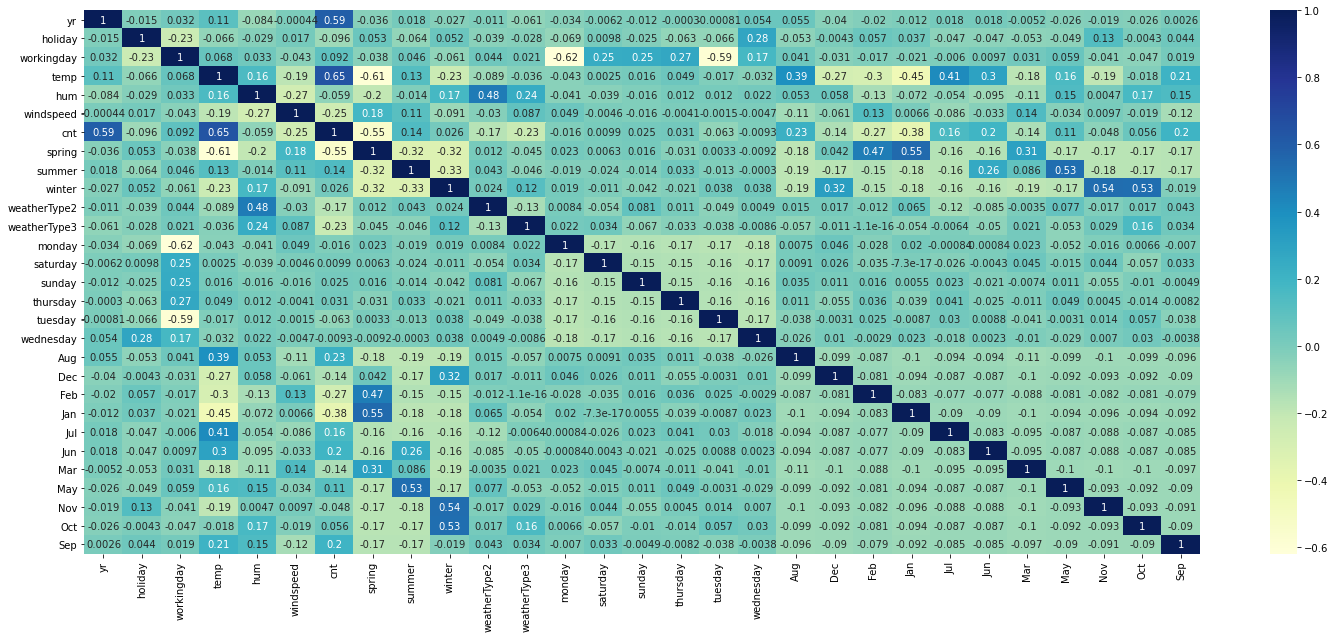

In [30]:
#correlation coefficients 
plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observation:
    
 Below are highly correlated with `cnt`
   - `temp` with `0.65`
   - `yr` with `0.59`
   - `spring` with `-0.55`

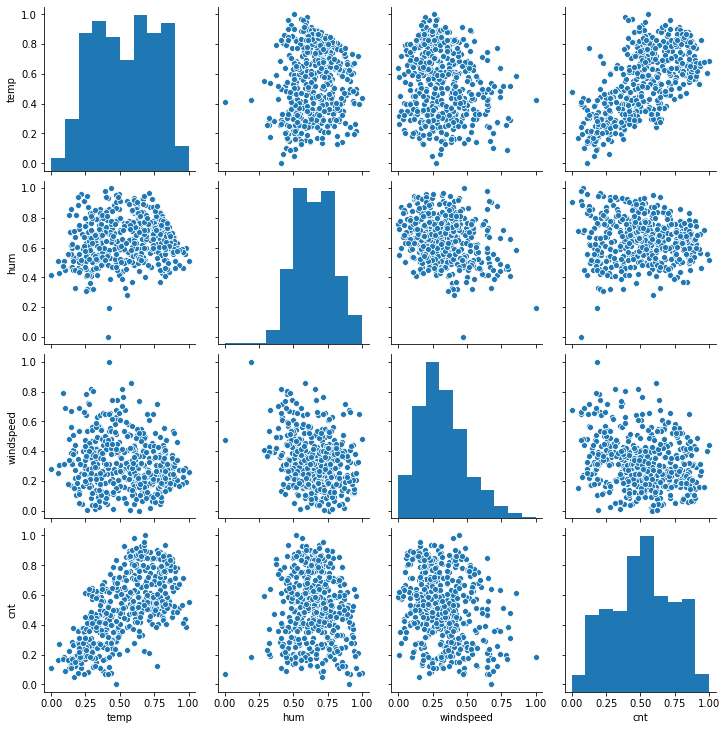

In [31]:
#plot the numerical variables using pairplot
sns.pairplot(df_train[['temp','hum','windspeed','cnt']])
plt.show()

**Dividing into X & Y train sets for the model building**

In [32]:
#preparing y_train with 'cnt'
y_train = df_train.pop('cnt')
#preparing x_train
X_train = df_train

In [33]:
#columns in X_train
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'weatherType2', 'weatherType3', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

### **Building Linear Model**

let's build our first linear regression model using `RFE` to select `top 16 features` out of 29  

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)   # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weatherType2', True, 1),
 ('weatherType3', True, 1),
 ('monday', True, 1),
 ('saturday', False, 12),
 ('sunday', False, 9),
 ('thursday', False, 8),
 ('tuesday', False, 6),
 ('wednesday', False, 7),
 ('Aug', False, 5),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1)]

In [37]:
#columns rfe selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'weatherType2', 'weatherType3', 'monday', 'Jan',
       'Jul', 'Nov', 'Sep'],
      dtype='object')

In [38]:
#columns rfe not selected
X_train.columns[~rfe.support_]

Index(['saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'Aug', 'Dec',
       'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

Observation:
    
   - our RFE selected below features as `top 16` :
        
        {'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'weatherType2', 'weatherType3', 'monday', 'Jan',
       'Jul', 'Nov', 'Sep'}

#### Building model using statsmodel, for the detailed statistics

In [39]:
#Function to build Linear Model
def build_linearModel(X_train):
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train)

    # Running the linear model
    lm= sm.OLS(y_train,X_train_lm).fit()  
    
    print(lm.summary())
    
    return lm

In [40]:
#Function to calculate VIF values
def VIF_values(X_train):
    vif = pd.DataFrame()
    X= X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [41]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
#Building the linear model with the RFE selected features 'X_train_rfe'
lm_1 = build_linearModel(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.30e-190
Time:                        17:57:29   Log-Likelihood:                 520.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2586      0.036      7.096   

In [43]:
# Calculate the VIFs for the new model
VIF_values(X_train_rfe)

        Features   VIF
4            hum 29.43
3           temp 17.90
2     workingday  5.32
5      windspeed  4.78
6         spring  4.57
8         winter  3.86
7         summer  2.86
9   weatherType2  2.29
0             yr  2.09
11        monday  1.98
12           Jan  1.67
14           Nov  1.60
13           Jul  1.59
15           Sep  1.40
10  weatherType3  1.25
1        holiday  1.20


Observation:

   - irrespective of the p-values, first I am going to drop the variable with higher VIF value ,i.e which is highly correlated with other variables in the dataset
   - Drop `hum` variable - `29.43` VIF value

In [44]:
# Creating 'X_train_new' dataframe by dropping 'hum'
X_train_new = X_train_rfe.drop(['hum'],axis=1)

lm_2 = build_linearModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.08e-187
Time:                        17:57:30   Log-Likelihood:                 511.51
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     494   BIC:                            -923.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1790      0.032      5.638   

In [45]:
#calculate the VIF values
VIF_values(X_train_new)

        Features  VIF
3           temp 7.11
2     workingday 5.26
4      windspeed 4.72
5         spring 3.09
7         winter 2.45
6         summer 2.34
0             yr 2.08
10        monday 1.97
11           Jan 1.62
13           Nov 1.60
12           Jul 1.59
8   weatherType2 1.58
14           Sep 1.36
1        holiday 1.20
9   weatherType3 1.09


Observation:

   - irrespective of the p-values, first I am going to drop the variable with higher VIF value ,i.e which is hihly correlated with other columns in the dataset
   - Drop `temp` variable -`7.11` VIF value

In [46]:
# Creating dataframe by dropping 'temp'
X_train_new = X_train_new.drop(['temp'],axis=1)

lm_3 = build_linearModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.5
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.20e-154
Time:                        17:57:30   Log-Likelihood:                 429.94
No. Observations:                 510   AIC:                            -829.9
Df Residuals:                     495   BIC:                            -766.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5450      0.020     27.349   

In [47]:
#calculate the VIF values
VIF_values(X_train_new)

        Features  VIF
3      windspeed 4.30
2     workingday 3.83
4         spring 2.98
6         winter 2.45
5         summer 2.29
0             yr 1.91
9         monday 1.69
10           Jan 1.60
12           Nov 1.59
7   weatherType2 1.57
11           Jul 1.30
13           Sep 1.26
1        holiday 1.15
8   weatherType3 1.09


Observation:
    
 - Drop `Jul` with p-value `0.587`

In [48]:
# Creating dataframe by dropping 'Jul'
X_train_new = X_train_new.drop(['Jul'],axis=1)

lm_4 = build_linearModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.15e-155
Time:                        17:57:30   Log-Likelihood:                 429.79
No. Observations:                 510   AIC:                            -831.6
Df Residuals:                     496   BIC:                            -772.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5404      0.018     29.863   

Drop `holiday`,which is having the p-value of `0.159`

In [49]:
# Creating dataframe by dropping 'holiday'
X_train_new = X_train_new.drop(['holiday'],axis=1)

lm_5 = build_linearModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.48e-156
Time:                        17:57:30   Log-Likelihood:                 428.77
No. Observations:                 510   AIC:                            -831.5
Df Residuals:                     497   BIC:                            -776.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5345      0.018     30.342   

In [50]:
#calculate the VIF values

VIF_values(X_train_new)

        Features  VIF
2      windspeed 4.08
1     workingday 3.29
3         spring 2.65
5         winter 2.25
4         summer 2.00
0             yr 1.88
9            Jan 1.60
6   weatherType2 1.57
10           Nov 1.57
8         monday 1.56
11           Sep 1.19
7   weatherType3 1.09


Observation:
  - We have left with `12` variables
  - `Adj.R2 value - 0.778`
  - `p-values < 0.05` for all the independent variables,which is statistically significant
  - `Lower AIC, BIC` values compared to the other models
  - `Probability (F-statistic)` 2.48e-156, which is less that 0.05
  - `VIF < 5` for all the predicators, indicating that the `multicollinearity is handled`

**Residual Distribution** :

In [51]:
#calculate the y predict values using the X_train

# Adding a constant variable to our train_set , which we provided for the lm_5 model.
X_train_lm = sm.add_constant(X_train_new)

y_train_pred = lm_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

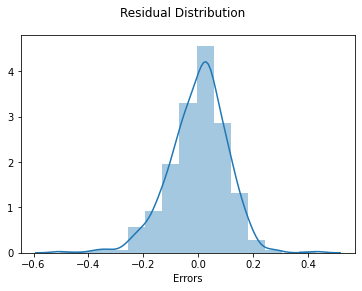

In [52]:
# Plot the histogram of the error terms
residuals = y_train - y_train_pred
fig = plt.figure()
sns.distplot(residuals, bins = 15)
fig.suptitle('Residual Distribution')                  # Plot heading 
plt.xlabel('Errors')  

Observation:

    - From the above histogram : the normality assumption(guassian distribution) is satisfied mostly. even though we haven't acheived the prefect normal distribution (bell curve). This suggests that our model is doing a good job

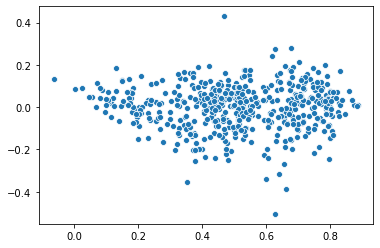

In [53]:
#Let's plot 'residuals' against the predicted values
sns.scatterplot(y_train_pred,residuals)

<Figure size 1440x360 with 0 Axes>

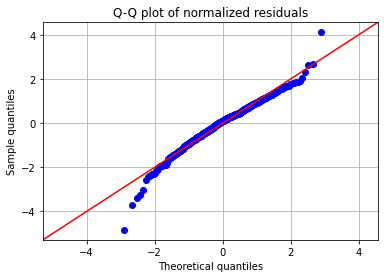

In [54]:
#importing Q-Q plot from statsmodel
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(20,5))
fig=qqplot(lm_5.resid_pearson,line='45',fit='True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("Q-Q plot of normalized residuals")
plt.grid(True)
plt.show()

Observation:
    
   - from the above `q-q plot`, it indicates that the `errors are normally distributed enough as it almost formed a straight line` 

In [55]:
#Function to plot the residual values Vs the independent variables
def res_Vs_independent(df,cols,linear_model):
    plt.figure(figsize=(35,20))
    i = 3
    j = (len(cols)//2)
    fig = 1       
    for col in cols:
        plt.subplot(i,j,fig)
        plt.title(col+ "vs. \nModel residuals")
        plt.scatter(x=df[col],y=linear_model.resid,color='dodgerblue',edgecolor='b')
        xmin=min(df[col])
        xmax = max(df[col])
        fig = fig + 1
        plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='black',linestyle='--',lw=3)
        plt.xlabel(col)
        plt.ylabel('Residuals')
    plt.show()

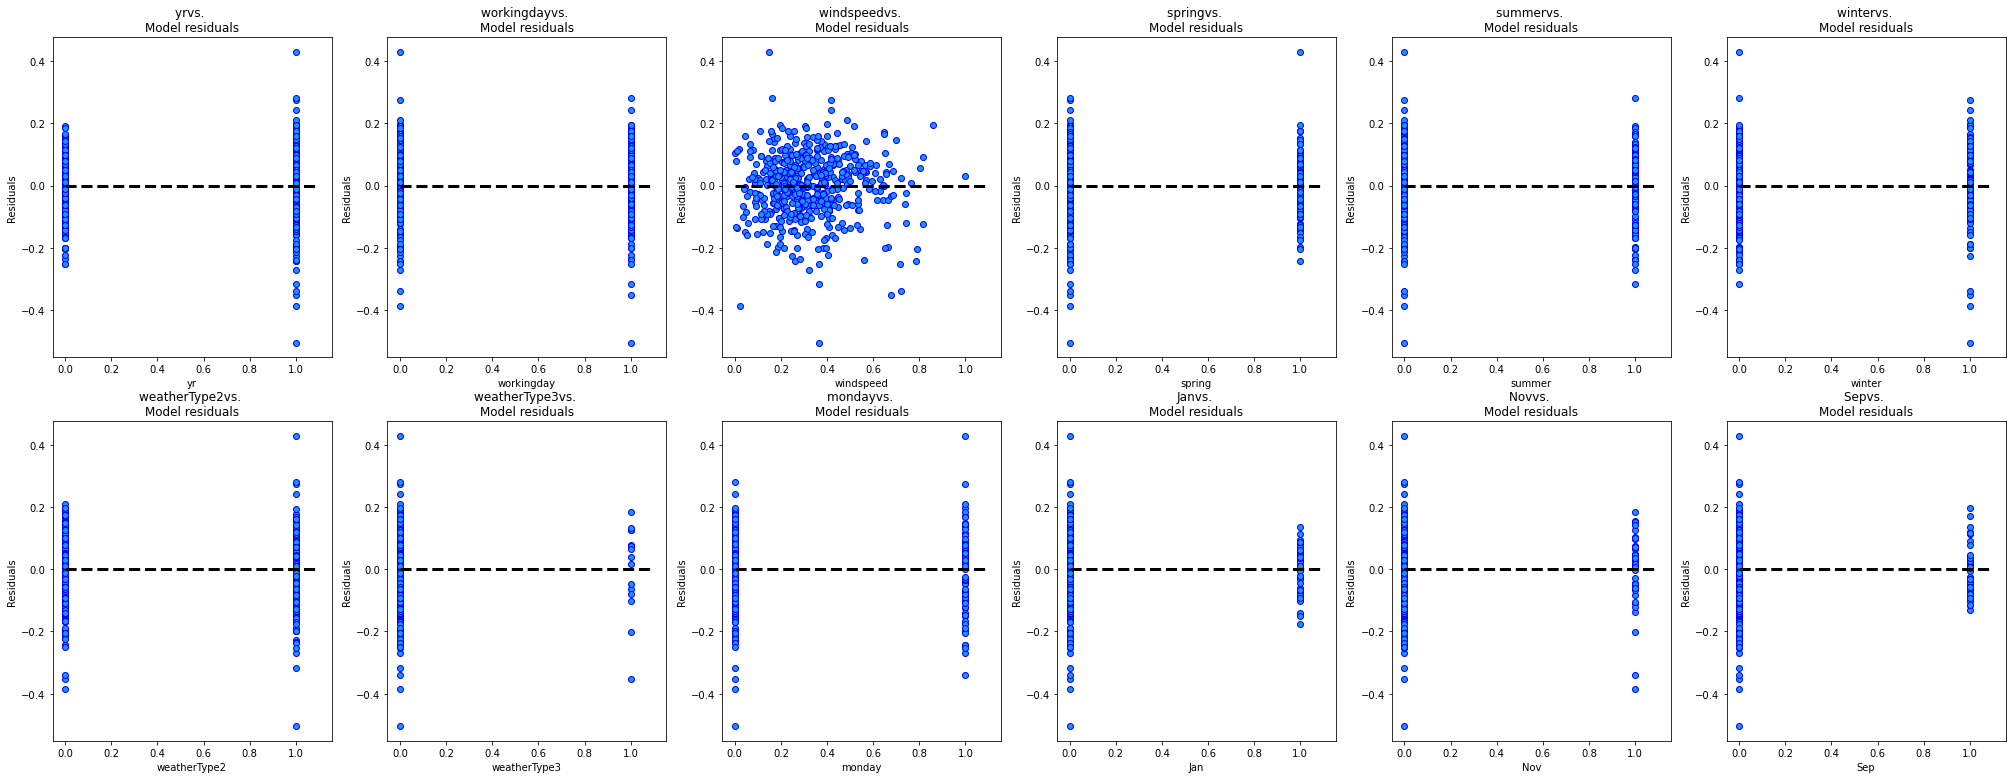

In [56]:
#plot the residual values Vs the independent variables
res_Vs_independent(X_train_new,X_train_new.columns,lm_5)

Observation:
    
   - `Residual plots`  show some bit of clustering but over all the residual distribution is same across the all the independent variables of our model. i.e having constant variance

#### Testing the final model `lm_5` using our df_test data

In [57]:
#Creating X_test,Y_test from df_test DataFrame 
y_test = df_test.pop('cnt')
X_test = df_test

#considering the columns which are in our final model only
X_test_new = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_new)

#predicted y values 
y_pred_lm = lm_5.predict(X_test_lm)

### R2 score for the test model

In [58]:
#calculate the R2 score for our test model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm)

0.7573616875984193

Observation:
    
   - We obtained r2_score, `0.757`,when tested on test data and it is acceptable as we the model we build provided `0.778`

Text(0.5, 0, 'Errors')

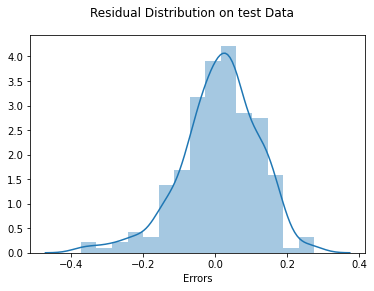

In [59]:
#let's see the residual distribution for our test data as well
residuals = y_test - y_pred_lm
fig = plt.figure()
sns.distplot(residuals, bins = 15)
fig.suptitle('Residual Distribution on test Data') # Plot heading 
plt.xlabel('Errors')  

Observation: 

The residuals are normally distributed enough around 0 even though we didn't have th exact bell curve.

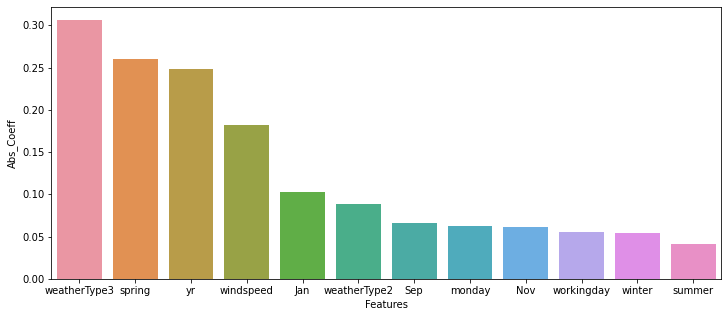

In [60]:
#Let's display the importance of each feature
importance = pd.DataFrame(columns=['Features','Actual_Coeff','Abs_Coeff']) 
importance['Actual_Coeff'] = pd.Series(lm_5.params.values[1:])
importance['Abs_Coeff'] = pd.Series(np.abs(lm_5.params.values[1:])) #lm_5.params.values[1:] gives the coefficients
importance['Features']= X_train_new.columns
importance.set_index('Features',inplace=True)
importance.sort_values(by=['Abs_Coeff'],inplace=True,ascending=False)
plt.figure(figsize = (12, 5))
sns.barplot(x=importance.index,y=importance.Abs_Coeff)
plt.show()

In [61]:
#Feature Coefficients
importance['Actual_Coeff']

Features
weatherType3   -0.31
spring         -0.26
yr              0.25
windspeed      -0.18
Jan            -0.10
weatherType2   -0.09
Sep             0.07
monday          0.06
Nov            -0.06
workingday      0.06
winter         -0.05
summer         -0.04
Name: Actual_Coeff, dtype: float64

Observation:
    
   - `weatherType3` ,`spring` , `yr` ,`windspeed` are the top 4 features in our model
   - weatherType3      : `-0.31`
   - spring            : `-0.26`
   - yr                : `0.25`
   - windspeed         : `-0.18`
   
Note: I have considered year as a numerical indicator, which will be increasing orderly year by year [Ex: (0:2018),(1:2019),(2:2020),...]